<a href="https://colab.research.google.com/github/johnnysDeu/Thesis/blob/main/PreTrained_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.youtube.com/watch?v=jztwpsIzEGc

Building a CNN from scratch with any image dataset

!pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [1]:
#!pip install "tensorflow<2.11"

In [2]:
#!pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [3]:
#!pip install torchvision

In [4]:

#!pip list
import torch

In [5]:
#!nvidia-smi

In [6]:
#!pip install torch==1.10.1+cu113 torchvision==0.11.2+cu113 torchaudio===0.10.1+cu113 -f https://download.pytorch.org/whl/cu113/torch_stable.html

In [7]:
# add headings with ##(space) on the markdowns

In [8]:
#!pip install tensorflor keras

In [9]:
import tensorflow as tf
import os

In [10]:
!nvidia-smi

Tue Jun  4 08:51:33 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 536.67                 Driver Version: 536.67       CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1660 ...  WDDM  | 00000000:2D:00.0  On |                  N/A |
|  0%   50C    P8              16W / 125W |    723MiB /  6144MiB |     32%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [11]:
gpus = tf.config.experimental.list_physical_devices('GPU')
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [12]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [13]:
#! nvidia-smi

In [14]:
#!pip install opencv-python

## Imports

In [15]:
import tensorflow as tf
import os
import cv2
import imghdr

In [16]:
#from google.colab import drive
#drive.mount('/content/drive')

In [17]:
import numpy as np
from matplotlib import pyplot as plt

In [18]:
#Current_dir = os.getcwd()
#Current_dir

In [19]:
#path = '/content/drive/MyDrive/Colab Notebooks/Thesis/data'
#os.chdir(path)

In [20]:
Current_dir = os.getcwd()
Current_dir

'c:\\Users\\YannisPC\\PycharmProjects\\Thesis\\Thesis'

In [21]:
base_dir = r"C:\Users\YannisPC\PycharmProjects\Thesis\Thesis\READY_BALANCED_SAME_SIZE_Random_Split"

In [22]:
data=tf.keras.utils.image_dataset_from_directory(base_dir, batch_size=32, image_size=(224,224))
#data=tf.keras.utils.image_dataset_from_directory('data_medium', batch_size=32, image_size=(150,150))

Found 34600 files belonging to 3 classes.


# Split Data

In [23]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [24]:
train_Ads_dir = os.path.join(train_dir, 'Ads')
train_sample_dir = os.path.join(train_dir, 'Sample')
train_Ads_dir

'C:\\Users\\YannisPC\\PycharmProjects\\Thesis\\Thesis\\READY_BALANCED_SAME_SIZE_Random_Split\\train\\Ads'

In [25]:
validation_Ads_dir = os.path.join(validation_dir, 'Ads')
validation_sample_dir = os.path.join(validation_dir, 'Sample')
validation_Ads_dir


'C:\\Users\\YannisPC\\PycharmProjects\\Thesis\\Thesis\\READY_BALANCED_SAME_SIZE_Random_Split\\validation\\Ads'

In [26]:
test_Ads_dir = os.path.join(test_dir, 'Ads')
test_sample_dir = os.path.join(test_dir, 'Sample')
test_Ads_dir

'C:\\Users\\YannisPC\\PycharmProjects\\Thesis\\Thesis\\READY_BALANCED_SAME_SIZE_Random_Split\\test\\Ads'

In [27]:
print('total training Ads images:', len(os.listdir(train_Ads_dir)))

total training Ads images: 10500


In [28]:
print('total training sample images:', len(os.listdir(train_sample_dir)))

total training sample images: 10500


In [29]:
print('total validation Ads images:', len(os.listdir(validation_Ads_dir)))

total validation Ads images: 3650


In [30]:
print('total validation sample images:', len(os.listdir(validation_sample_dir)))

total validation sample images: 3950


In [31]:
print('total test Ads images:', len(os.listdir(test_Ads_dir)))

total test Ads images: 3000


In [32]:
print('total test sample images:', len(os.listdir(test_sample_dir)))

total test sample images: 3000


## Using data augmentation/ datagen

In [33]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')


# train_datagen = ImageDataGenerator(
#     rescale=1./255)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(224, 224),
        batch_size=32, #32
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary')

Found 21000 images belonging to 2 classes.
Found 7600 images belonging to 2 classes.


## Pretrained Model Inception

In [34]:
import keras
from keras.models import load_model


# Appling a Pre-trained CNN on our Dataset for comparison

The MobileNet model




In [35]:
from keras.applications import Xception

conv_base = Xception(weights='imagenet',
                 include_top=False,
                 input_shape=(224, 224, 3))

In [36]:
conv_base.summary()


Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                          

We will add a dense layer after our conv_base NN

In [37]:
from keras import models
from keras import layers

modelPreTXce = models.Sequential()
modelPreTXce.add(conv_base)

modelPreTXce.add(layers.Flatten())
modelPreTXce.add(layers.Dense(256, activation='relu'))
modelPreTXce.add(layers.Dropout(0.5))
modelPreTXce.add(layers.Dense(1, activation='sigmoid'))

In [38]:
modelPreTXce.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 256)               25690368  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 46,552,105
Trainable params: 46,497,577
Non-trainable params: 54,528
_________________________________________________________________


In [39]:
class TrainingConfig:
    BATCH_SIZE:       int   = 64
    EPOCHS:           int   = 101
    LEARNING_RATE:    float = 0.0001
    DROPOUT:          float = 0.5
    LAYERS_FINE_TUNE: int   = 8   

In [40]:
# Specify the number of layers to fine tune at the end of the convolutional base.
num_layers_fine_tune = TrainingConfig.LAYERS_FINE_TUNE
num_layers = len(conv_base.layers)

Before training the model, we need to separate the pretrained model from our DNN which is added on top of that. So that when we train our model we dont ruin the pretrained weights and biased of the ResNet50

In [41]:
print('This is the number of trainable weights '
      'before freezing the conv base:', len(modelPreTXce.trainable_weights))

This is the number of trainable weights before freezing the conv base: 158


In [42]:
# Freeze the initial layers in the convolutional base.
for model_layer in conv_base.layers[:num_layers - num_layers_fine_tune]:
    print(f"FREEZING LAYER: {model_layer}")
    model_layer.trainable = False

FREEZING LAYER: <keras.engine.input_layer.InputLayer object at 0x000001BF67626820>
FREEZING LAYER: <keras.layers.convolutional.conv2d.Conv2D object at 0x000001BF6762EBB0>
FREEZING LAYER: <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x000001BF67622F70>
FREEZING LAYER: <keras.layers.core.activation.Activation object at 0x000001BF67622940>
FREEZING LAYER: <keras.layers.convolutional.conv2d.Conv2D object at 0x000001C099F4DA30>
FREEZING LAYER: <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x000001C099F4D9A0>
FREEZING LAYER: <keras.layers.core.activation.Activation object at 0x000001C099F7FCD0>
FREEZING LAYER: <keras.layers.convolutional.separable_conv2d.SeparableConv2D object at 0x000001C099F973A0>
FREEZING LAYER: <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x000001C099F90C70>
FREEZING LAYER: <keras.layers.core.activation.Activation object at 0x000001C099FAE3D0>
FREEZING LAYER: <keras.layers.conv

In [40]:
#conv_base.trainable = False

In [43]:
print('This is the number of trainable weights '
      'after freezing the conv base:', len(modelPreTXce.trainable_weights))

This is the number of trainable weights after freezing the conv base: 14


In [44]:
modelPreTXce.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 256)               25690368  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 46,552,105
Trainable params: 30,441,473
Non-trainable params: 16,110,632
_________________________________________________________________


In [45]:
modelPreTXce.compile('Adagrad', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])# Adagrad, adam

In [46]:
histPreT = modelPreTXce.fit(train_generator, epochs=60, validation_data=validation_generator) #  epochs 10 are over fitting. early stop at?

Epoch 1/30
657/657 [==============================] - 135s 195ms/step - loss: 0.3516 - accuracy: 0.8580 - val_loss: 0.2889 - val_accuracy: 0.8843
Epoch 2/30
657/657 [==============================] - 127s 193ms/step - loss: 0.2730 - accuracy: 0.8925 - val_loss: 0.2689 - val_accuracy: 0.8939
Epoch 3/30
657/657 [==============================] - 127s 194ms/step - loss: 0.2372 - accuracy: 0.9078 - val_loss: 0.2634 - val_accuracy: 0.8933
Epoch 4/30
657/657 [==============================] - 128s 194ms/step - loss: 0.2072 - accuracy: 0.9202 - val_loss: 0.2616 - val_accuracy: 0.8979
Epoch 5/30
657/657 [==============================] - 128s 194ms/step - loss: 0.1867 - accuracy: 0.9300 - val_loss: 0.2605 - val_accuracy: 0.9004
Epoch 6/30
657/657 [==============================] - 128s 194ms/step - loss: 0.1639 - accuracy: 0.9409 - val_loss: 0.2619 - val_accuracy: 0.9000
Epoch 7/30
657/657 [==============================] - 128s 194ms/step - loss: 0.1455 - accuracy: 0.9503 - val_loss: 0.2602 -

In [47]:
modelPreTXce.save(os.path.join('models/Latest','Pretrained_Xception_ad_class_with_Aug_FT8.h5'))

In [48]:
START_PLOT_FROM_EPOCH= 1

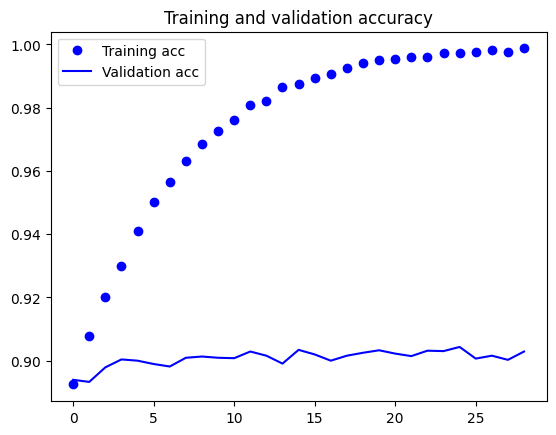

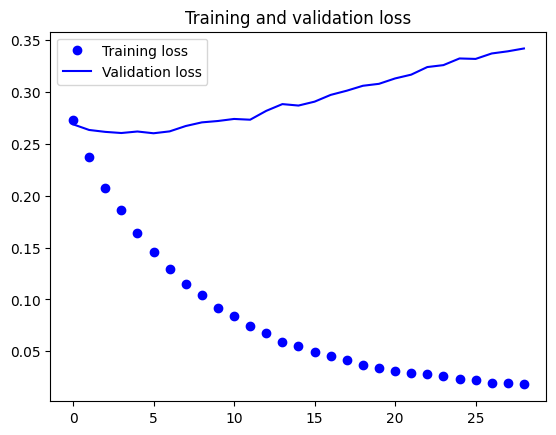

In [49]:
acc = histPreT.history['accuracy'][START_PLOT_FROM_EPOCH:]
val_acc = histPreT.history['val_accuracy'][START_PLOT_FROM_EPOCH:]
loss = histPreT.history['loss'][START_PLOT_FROM_EPOCH:]
val_loss = histPreT.history['val_loss'][START_PLOT_FROM_EPOCH:]

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [50]:
val_acc_per_epoch = histPreT.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Best epoch: 26


## Evaluate

In [51]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [52]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary')

test_loss, test_acc = modelPreTXce.evaluate(test_generator, steps=len(test_generator))  # steps_per_epoch * epochs
print('test acc:', test_acc)
print('test loss:', test_loss)


Found 6000 images belonging to 2 classes.
188/188 [==============================] - 23s 121ms/step - loss: 0.3482 - accuracy: 0.8980
test acc: 0.8980000019073486
test loss: 0.3482113778591156


In [53]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Initialize lists to collect true labels and predictions
true_labels = []
predicted_labels = []

In [54]:
for _ in range(len(test_generator)):
    X, y = next(test_generator)

    yhat = modelPreTXce.predict(X)
    
    y_true_batch = y # Labels
    
    # Convert probabilities to class labels using a threshold of 0.5
    y_pred_batch = (yhat > 0.5).astype(int)

    # Append the true labels and predictions for this batch to the lists
    true_labels.extend(y_true_batch)
    predicted_labels.extend(y_pred_batch)

    if len(true_labels) >= test_generator.n:
        break

1/1 [==============================] - 1s 647ms/step


In [55]:
# Convert lists to numpy arrays
true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)

In [56]:
# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

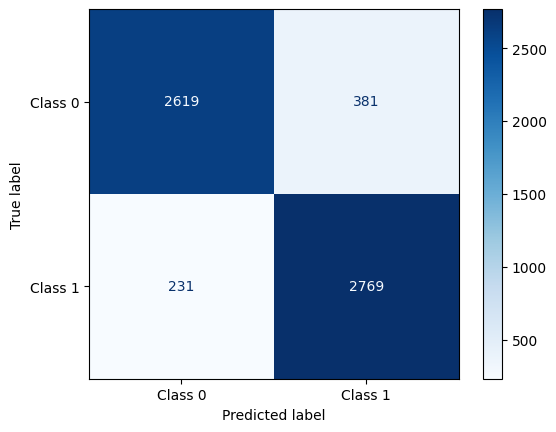

In [57]:
# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap=plt.cm.Blues)
plt.show()